In [3]:
# import libraries


import os
from dotenv import load_dotenv



In [9]:
# Load the variables from the .env file
load_dotenv()

True

In [12]:
owm_api = os.environ['OPENWEATHERMAP_API_KEY']

owm_api

'9b833c0ea6426b70902aa7a4b1da285c'

In [182]:
weather = pd.read_csv("San_Juan_weather.csv")

weather_df = pd.DataFrame(weather)

In [183]:
weather_df

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,283996800,1979-01-01 00:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,75.20,10000.0,70.03,76.37,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
1,284000400,1979-01-01 01:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,74.62,NaN,70.83,75.92,...,NaN,NaN,NaN,NaN,NaN,35,802,Clouds,scattered clouds,03n
2,284004000,1979-01-01 02:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,74.39,NaN,70.93,75.70,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n
3,284007600,1979-01-01 03:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,72.50,10000.0,68.41,73.54,...,22.82,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,284011200,1979-01-01 04:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,72.19,10000.0,68.11,73.20,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390343,1672513200,2022-12-31 19:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,81.75,10000.0,71.83,86.40,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
390344,1672516800,2022-12-31 20:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,81.57,10000.0,72.48,86.45,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
390345,1672520400,2022-12-31 21:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,79.63,10000.0,71.78,79.63,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
390346,1672524000,2022-12-31 22:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,78.33,10000.0,71.28,79.57,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n


In [184]:
null_pct = weather_df.apply(pd.isnull).sum()/weather_df.shape[0]
null_pct

dt                     0.000000
dt_iso                 0.000000
timezone               0.000000
city_name              0.000000
lat                    0.000000
lon                    0.000000
temp                   0.000000
visibility             0.143800
dew_point              0.000000
feels_like             0.000000
temp_min               0.000000
temp_max               0.000000
pressure               0.000000
sea_level              1.000000
grnd_level             1.000000
humidity               0.000000
wind_speed             0.000000
wind_deg               0.000000
wind_gust              0.908274
rain_1h                0.796459
rain_3h                1.000000
snow_1h                1.000000
snow_3h                1.000000
clouds_all             0.000000
weather_id             0.000000
weather_main           0.000000
weather_description    0.000000
weather_icon           0.000000
dtype: float64

In [185]:
valid_columns = weather_df.columns[null_pct < .05]


In [186]:
valid_columns


Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

In [187]:
weather_df = weather_df[valid_columns].copy()


In [188]:
weather_df.columns = weather_df.columns.str.lower()


In [189]:
weather_df

,dt,dt_iso,timezone,city_name,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,283996800,1979-01-01 00:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,75.20,70.03,76.37,73.63,79.25,1018,84,9.17,50,40,802,Clouds,scattered clouds,03n
1,284000400,1979-01-01 01:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,74.62,70.83,75.92,73.20,78.42,1018,88,7.07,50,35,802,Clouds,scattered clouds,03n
2,284004000,1979-01-01 02:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,74.39,70.93,75.70,72.93,78.30,1018,89,7.11,45,52,803,Clouds,broken clouds,04n
3,284007600,1979-01-01 03:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,72.50,68.41,73.54,70.92,75.61,1018,87,13.65,70,40,802,Clouds,scattered clouds,03n
4,284011200,1979-01-01 04:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,72.19,68.11,73.20,70.48,75.16,1018,87,6.71,80,75,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390343,1672513200,2022-12-31 19:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,81.75,71.83,86.40,79.38,84.90,1017,72,16.11,80,40,802,Clouds,scattered clouds,03d
390344,1672516800,2022-12-31 20:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,81.57,72.48,86.45,79.38,84.45,1017,74,16.11,80,40,802,Clouds,scattered clouds,03d
390345,1672520400,2022-12-31 21:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,79.63,71.78,79.63,77.36,82.45,1018,77,13.80,70,40,802,Clouds,scattered clouds,03d
390346,1672524000,2022-12-31 22:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,78.33,71.28,79.57,76.37,79.90,1018,79,9.22,70,40,802,Clouds,scattered clouds,03n


In [190]:
weather_df.drop(['dt', 'city_name', 'lat', 'lon',
       'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'], axis=1, inplace=True)

In [191]:
weather_df

,dt_iso,timezone,temp,wind_speed,wind_deg
0,1979-01-01 00:00:00 +0000 UTC,-14400,75.20,9.17,50
1,1979-01-01 01:00:00 +0000 UTC,-14400,74.62,7.07,50
2,1979-01-01 02:00:00 +0000 UTC,-14400,74.39,7.11,45
3,1979-01-01 03:00:00 +0000 UTC,-14400,72.50,13.65,70
4,1979-01-01 04:00:00 +0000 UTC,-14400,72.19,6.71,80
...,...,...,...,...,...
390343,2022-12-31 19:00:00 +0000 UTC,-14400,81.75,16.11,80
390344,2022-12-31 20:00:00 +0000 UTC,-14400,81.57,16.11,80
390345,2022-12-31 21:00:00 +0000 UTC,-14400,79.63,13.80,70
390346,2022-12-31 22:00:00 +0000 UTC,-14400,78.33,9.22,70


In [192]:
weather_df = weather_df.ffill()


In [193]:
weather_df.apply(pd.isnull).sum()


dt_iso        0
timezone      0
temp          0
wind_speed    0
wind_deg      0
dtype: int64

In [194]:
weather_df.apply(lambda x: (x == 9999).sum())


dt_iso        0
timezone      0
temp          0
wind_speed    0
wind_deg      0
dtype: int64

In [195]:
weather.dtypes


dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [196]:
weather_df.index


RangeIndex(start=0, stop=390348, step=1)

In [197]:
weather_df

,dt_iso,timezone,temp,wind_speed,wind_deg
0,1979-01-01 00:00:00 +0000 UTC,-14400,75.20,9.17,50
1,1979-01-01 01:00:00 +0000 UTC,-14400,74.62,7.07,50
2,1979-01-01 02:00:00 +0000 UTC,-14400,74.39,7.11,45
3,1979-01-01 03:00:00 +0000 UTC,-14400,72.50,13.65,70
4,1979-01-01 04:00:00 +0000 UTC,-14400,72.19,6.71,80
...,...,...,...,...,...
390343,2022-12-31 19:00:00 +0000 UTC,-14400,81.75,16.11,80
390344,2022-12-31 20:00:00 +0000 UTC,-14400,81.57,16.11,80
390345,2022-12-31 21:00:00 +0000 UTC,-14400,79.63,13.80,70
390346,2022-12-31 22:00:00 +0000 UTC,-14400,78.33,9.22,70


In [198]:
#weather_df['dt_iso'] = str(weather_df['dt_iso'])

In [199]:
weather_df['dt_iso']

0         1979-01-01 00:00:00 +0000 UTC
1         1979-01-01 01:00:00 +0000 UTC
2         1979-01-01 02:00:00 +0000 UTC
3         1979-01-01 03:00:00 +0000 UTC
4         1979-01-01 04:00:00 +0000 UTC
                      ...              
390343    2022-12-31 19:00:00 +0000 UTC
390344    2022-12-31 20:00:00 +0000 UTC
390345    2022-12-31 21:00:00 +0000 UTC
390346    2022-12-31 22:00:00 +0000 UTC
390347    2022-12-31 23:00:00 +0000 UTC
Name: dt_iso, Length: 390348, dtype: object

In [200]:
# replace the string in the 'date' column
weather_df['dt_iso'] = weather_df['dt_iso'].str.replace('\+0000 UTC', '-04:00')

weather_df

C:\Users\marcl\AppData\Local\Temp\ipykernel_8064\3457383083.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  weather_df['dt_iso'] = weather_df['dt_iso'].str.replace('\+0000 UTC', '-04:00')


,dt_iso,timezone,temp,wind_speed,wind_deg
0,1979-01-01 00:00:00 -04:00,-14400,75.20,9.17,50
1,1979-01-01 01:00:00 -04:00,-14400,74.62,7.07,50
2,1979-01-01 02:00:00 -04:00,-14400,74.39,7.11,45
3,1979-01-01 03:00:00 -04:00,-14400,72.50,13.65,70
4,1979-01-01 04:00:00 -04:00,-14400,72.19,6.71,80
...,...,...,...,...,...
390343,2022-12-31 19:00:00 -04:00,-14400,81.75,16.11,80
390344,2022-12-31 20:00:00 -04:00,-14400,81.57,16.11,80
390345,2022-12-31 21:00:00 -04:00,-14400,79.63,13.80,70
390346,2022-12-31 22:00:00 -04:00,-14400,78.33,9.22,70


In [201]:
# convert the date string to pandas datetime format
#weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], format='%Y-%m-%d %H:%M:%S %Z')

In [202]:
# Convert the 'date' column to a datetime format
#weather_df['date'] = weather_df['dt_iso'].apply(lambda x: parser.parse(x[:26]).replace(tzinfo=tz.tzutc()))



In [203]:
weather_df.set_index('dt_iso', inplace=True)


In [204]:
weather_df

,timezone,temp,wind_speed,wind_deg
dt_iso,,,,
1979-01-01 00:00:00 -04:00,-14400,75.20,9.17,50
1979-01-01 01:00:00 -04:00,-14400,74.62,7.07,50
1979-01-01 02:00:00 -04:00,-14400,74.39,7.11,45
1979-01-01 03:00:00 -04:00,-14400,72.50,13.65,70
1979-01-01 04:00:00 -04:00,-14400,72.19,6.71,80
...,...,...,...,...
2022-12-31 19:00:00 -04:00,-14400,81.75,16.11,80
2022-12-31 20:00:00 -04:00,-14400,81.57,16.11,80
2022-12-31 21:00:00 -04:00,-14400,79.63,13.80,70


In [205]:
weather_df.index = pd.to_datetime(weather_df.index)

weather_df

,timezone,temp,wind_speed,wind_deg
dt_iso,,,,
1979-01-01 00:00:00-04:00,-14400,75.20,9.17,50
1979-01-01 01:00:00-04:00,-14400,74.62,7.07,50
1979-01-01 02:00:00-04:00,-14400,74.39,7.11,45
1979-01-01 03:00:00-04:00,-14400,72.50,13.65,70
1979-01-01 04:00:00-04:00,-14400,72.19,6.71,80
...,...,...,...,...
2022-12-31 19:00:00-04:00,-14400,81.75,16.11,80
2022-12-31 20:00:00-04:00,-14400,81.57,16.11,80
2022-12-31 21:00:00-04:00,-14400,79.63,13.80,70


In [206]:
#weather_df.index.year.value_counts().sort_index()


In [207]:
# convert DatetimeIndex object to Series with datetime column
#date_series = pd.Series(weather_df.index)

# extract year from datetime column
#year_series = date_series.dt.year

#year_series

In [208]:
# reset the index
#weather_df.reset_index(drop=True, inplace=True)

#weather_df

In [209]:
# group values by year and calculate mean
#mean_by_year = weather_df.groupby(year_series)['wind_speed'].mean()

#mean_by_year.head()

<AxesSubplot:xlabel='dt_iso'>

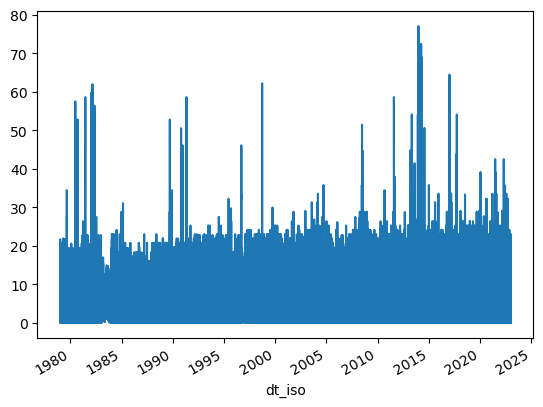

In [210]:
weather_df["wind_speed"].plot()

In [211]:
weather_df["target_wind"] = weather_df.shift(-1)["wind_speed"]

weather_df

,timezone,temp,wind_speed,wind_deg,target_wind
dt_iso,,,,,
1979-01-01 00:00:00-04:00,-14400,75.20,9.17,50,7.07
1979-01-01 01:00:00-04:00,-14400,74.62,7.07,50,7.11
1979-01-01 02:00:00-04:00,-14400,74.39,7.11,45,13.65
1979-01-01 03:00:00-04:00,-14400,72.50,13.65,70,6.71
1979-01-01 04:00:00-04:00,-14400,72.19,6.71,80,6.04
...,...,...,...,...,...
2022-12-31 19:00:00-04:00,-14400,81.75,16.11,80,16.11
2022-12-31 20:00:00-04:00,-14400,81.57,16.11,80,13.80
2022-12-31 21:00:00-04:00,-14400,79.63,13.80,70,9.22


In [212]:
weather_df = weather_df.ffill()


In [213]:
weather_df

,timezone,temp,wind_speed,wind_deg,target_wind
dt_iso,,,,,
1979-01-01 00:00:00-04:00,-14400,75.20,9.17,50,7.07
1979-01-01 01:00:00-04:00,-14400,74.62,7.07,50,7.11
1979-01-01 02:00:00-04:00,-14400,74.39,7.11,45,13.65
1979-01-01 03:00:00-04:00,-14400,72.50,13.65,70,6.71
1979-01-01 04:00:00-04:00,-14400,72.19,6.71,80,6.04
...,...,...,...,...,...
2022-12-31 19:00:00-04:00,-14400,81.75,16.11,80,16.11
2022-12-31 20:00:00-04:00,-14400,81.57,16.11,80,13.80
2022-12-31 21:00:00-04:00,-14400,79.63,13.80,70,9.22


In [214]:
rr = Ridge(alpha=.1)


In [215]:
predictors = weather_df.columns[~weather_df.columns.isin(["target_wind", "city_name"])]


In [216]:
def backtest(weather_df, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather_df.shape[0], step):
        train = weather_df.iloc[:i,:]
        test = weather_df.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target_wind"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target_wind"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [217]:
predictions = backtest(weather_df, rr, predictors)


In [218]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

2.3332709534198184

In [219]:
predictions.sort_values("diff", ascending=False)


,actual,prediction,diff
dt_iso,,,
2013-12-24 18:00:00-04:00,77.04,7.446426,69.593574
2014-04-17 09:00:00-04:00,63.24,3.940292,59.299708
2014-03-29 14:00:00-04:00,72.43,13.210633,59.219367
2013-12-19 21:00:00-04:00,70.13,13.447144,56.682856
2014-04-04 22:00:00-04:00,68.99,13.407065,55.582935
...,...,...,...
1982-03-31 04:00:00-04:00,4.47,4.470044,0.000044
1988-11-30 07:00:00-04:00,5.82,5.820037,0.000037
2001-12-07 08:00:00-04:00,5.82,5.820023,0.000023


In [220]:
pd.Series(rr.coef_, index=predictors)


timezone      0.000000
temp          0.160909
wind_speed    0.752867
wind_deg     -0.005008
dtype: float64

In [221]:
weather_df.columns

Index(['timezone', 'temp', 'wind_speed', 'wind_deg', 'target_wind'], dtype='object')

In [222]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather_df, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather_df[label] = weather_df[col].rolling(horizon).mean()
    weather_df[f"{label}_pct"] = pct_diff(weather_df[label], weather_df[col])
    return weather_df
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ['temp', 'wind_speed', 'wind_deg']:
        weather_df = compute_rolling(weather_df, horizon, col)

In [223]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ['temp', 'wind_speed', 'wind_deg']:
    weather_df[f"month_avg_{col}"] = weather_df[col].groupby(weather_df.index.month, group_keys=False).apply(expand_mean)
    weather_df[f"day_avg_{col}"] = weather_df[col].groupby(weather_df.index.day_of_year, group_keys=False).apply(expand_mean)

In [224]:
weather_df = weather_df.iloc[14:,:]
weather_df = weather_df.fillna(0)

In [225]:
predictors = weather_df.columns[~weather_df.columns.isin(["target_wind", "city_name"])]


In [226]:
predictions = backtest(weather_df, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])


2.1463176126883177

In [227]:
mean_squared_error(predictions["actual"], predictions["prediction"])


8.12381271050194

In [228]:
predictions.sort_values("diff", ascending=False)


,actual,prediction,diff
dt_iso,,,
2013-12-24 18:00:00-04:00,77.04,8.878274,68.161726
2014-04-17 09:00:00-04:00,63.24,3.914032,59.325968
2014-03-29 14:00:00-04:00,72.43,14.646563,57.783437
2013-12-19 21:00:00-04:00,70.13,12.534853,57.595147
2014-04-04 22:00:00-04:00,68.99,14.279003,54.710997
...,...,...,...
2005-04-02 23:00:00-04:00,6.93,6.930048,0.000048
1996-06-01 23:00:00-04:00,4.70,4.700036,0.000036
2006-09-05 14:00:00-04:00,12.75,12.750017,0.000017


In [231]:
weather_df.loc["2013-12-24 18:00:00-04:00": "2013-12-31 18:00:00-04:00"]


,timezone,temp,wind_speed,wind_deg,target_wind,rolling_3_temp,rolling_3_temp_pct,rolling_3_wind_speed,rolling_3_wind_speed_pct,rolling_3_wind_deg,...,rolling_14_wind_speed,rolling_14_wind_speed_pct,rolling_14_wind_deg,rolling_14_wind_deg_pct,month_avg_temp,day_avg_temp,month_avg_wind_speed,day_avg_wind_speed,month_avg_wind_deg,day_avg_wind_deg
dt_iso,,,,,,,,,,,,,,,,,,,,,
2013-12-24 18:00:00-04:00,-14400,78.73,6.93,0,77.04,76.436667,0.030003,3.456667,1.004822,0.000000,...,4.686429,0.478738,70.000000,-1.000000,77.320604,76.974624,7.351944,7.662401,86.630853,91.826762
2013-12-24 19:00:00-04:00,-14400,78.28,77.04,41,6.93,78.356667,-0.000978,29.136667,1.644091,13.666667,...,9.367857,7.223866,67.928571,-0.396425,77.320641,76.976181,7.354601,7.745191,86.629113,91.766110
2013-12-24 20:00:00-04:00,-14400,76.73,6.93,0,4.70,77.913333,-0.015188,30.300000,-0.771287,13.666667,...,9.206429,-0.247265,63.857143,-1.000000,77.320618,76.975888,7.354584,7.744219,86.625810,91.656734
2013-12-24 21:00:00-04:00,-14400,77.50,4.70,120,4.70,77.503333,-0.000043,29.556667,-0.840983,53.666667,...,9.542143,-0.507448,72.428571,0.656805,77.320625,76.976512,7.354483,7.740595,86.627082,91.690476
2013-12-24 22:00:00-04:00,-14400,75.52,4.70,320,4.70,76.583333,-0.013885,5.443333,-0.136558,146.666667,...,9.467143,-0.503546,86.500000,2.699422,77.320557,76.974780,7.354382,7.736980,86.635979,91.961950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 14:00:00-04:00,-14400,82.02,19.69,70,13.87,79.513333,0.031525,12.336667,0.596055,86.666667,...,8.990714,1.190037,70.000000,0.000000,77.323302,76.586940,7.356668,8.455326,86.600690,84.931198
2013-12-31 15:00:00-04:00,-14400,83.39,13.87,90,19.69,81.890000,0.018317,15.020000,-0.076565,80.000000,...,8.910714,0.556553,70.000000,0.285714,77.323532,76.595000,7.356914,8.461742,86.600818,84.937204
2013-12-31 16:00:00-04:00,-14400,84.15,19.69,70,17.27,83.186667,0.011580,17.750000,0.109296,76.666667,...,9.577143,1.055937,68.571429,0.020833,77.323791,76.603941,7.357382,8.475030,86.600189,84.919527


<AxesSubplot:>

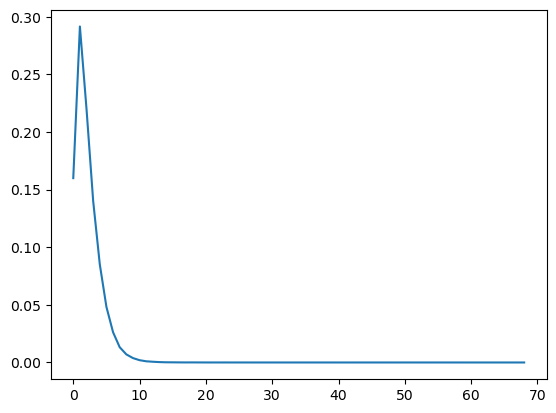

In [232]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()


In [233]:
predictions


,actual,prediction,diff
dt_iso,,,
1979-06-01 21:00:00-04:00,4.25,7.466724,3.216724
1979-06-01 22:00:00-04:00,4.43,6.903419,2.473419
1979-06-01 23:00:00-04:00,5.82,5.540529,0.279471
1979-06-02 00:00:00-04:00,4.05,5.492300,1.442300
1979-06-02 01:00:00-04:00,5.59,4.987470,0.602530
...,...,...,...
2022-12-31 19:00:00-04:00,16.11,14.981941,1.128059
2022-12-31 20:00:00-04:00,13.80,14.927805,1.127805
2022-12-31 21:00:00-04:00,9.22,12.575362,3.355362
